In [37]:
ls


admission_predict.csv  admission_predict.ipynb


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv('admission_predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [40]:
df = df.drop('Serial No.' ,  axis=1)

In [41]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [42]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

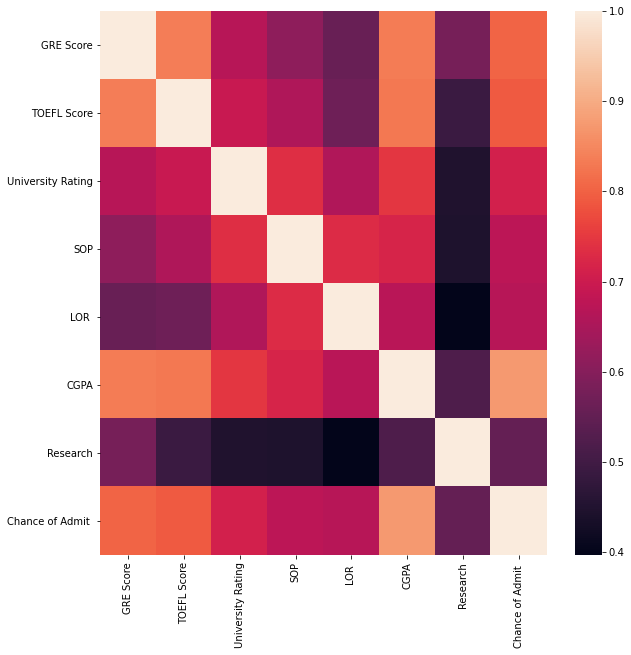

In [43]:
plt.figure(figsize=(10 , 10))
sns.heatmap(df.corr())
plt.show()

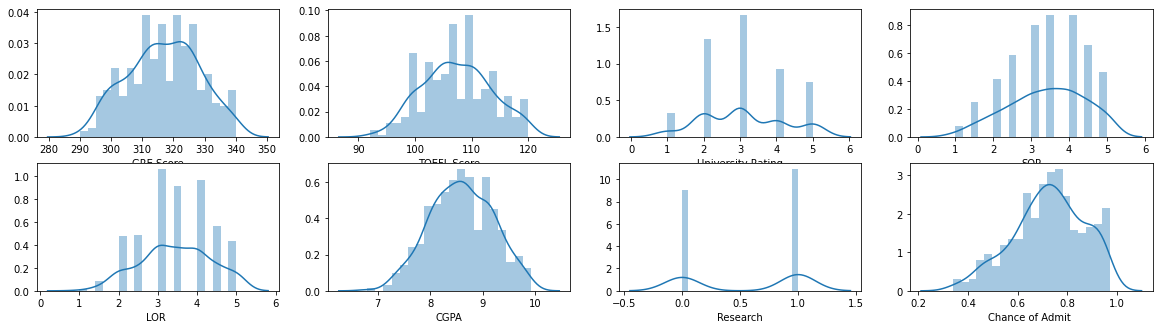

In [44]:
plt.figure(figsize=(20,25))
for i , val in enumerate(df.keys()):
    plt.subplot(9 , 4 , i+1)
    sns.distplot(df[val] , bins=20)
    

In [45]:
from sklearn.model_selection import train_test_split

x = df.iloc[: , :-1].values
y = df.iloc[: , -1].values
print(x.shape)
print(y.shape)


(400, 7)
(400,)


In [46]:
x_train , x_test , y_train  , y_test = train_test_split(x , y , test_size=0.2)
print(x_test.shape , x_train.shape , y_train.shape , y_test.shape)

(80, 7) (320, 7) (320,) (80,)


In [47]:
from sklearn.linear_model import LogisticRegression

In [49]:
lr = LogisticRegression()
y_train1=[]
y_test1 = []
for i in y_train:
    if i >= 0.5:
        y_train1.append(1)
    else:
        y_train1.append(0)
for i in y_test:
    if i >= 0.5:
        y_test1.append(1)
    else:
        y_test1.append(0)        
        
classifier = lr.fit(x_train , y_train1)
y_pred = classifier.predict(x_test)
print(y_test1)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


/home/iiitk/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [55]:
from sklearn.metrics import confusion_matrix , accuracy_score , precision_score
cnf_m = confusion_matrix(y_test1 , y_pred)
print(cnf_m)
print("Acurracy Score",accuracy_score(y_test1 , y_pred))
print("Precision Score" , precision_score(y_test1 , y_pred))

[[ 2  6]
 [ 1 71]]
Acurracy Score 0.9125
Precision Score 0.922077922077922


Text(0.5, 15.0, 'Predicted label')

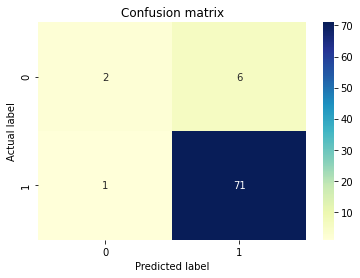

In [58]:
sns.heatmap(cnf_m ,  annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')